# 5 Filters

To filter signals on graphs, we need to define filters. They are represented in the toolbox by the [`pygsp.filters.Filter` class](https://pygsp.readthedocs.io/en/stable/reference/filters.html). Filters are usually defined in the spectral domain. Given the transfer function

**TODO**
* look at <https://pygsp.readthedocs.io/en/stable/tutorials/intro.html#filters>
* localization as great tool to visualize filters in the vertex domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters

## 5.1 Heat diffusion

**TODO**: show that this is heat diffusion

Text(0.5,0,"$\\lambda$: laplacian's eigenvalues / graph frequencies")

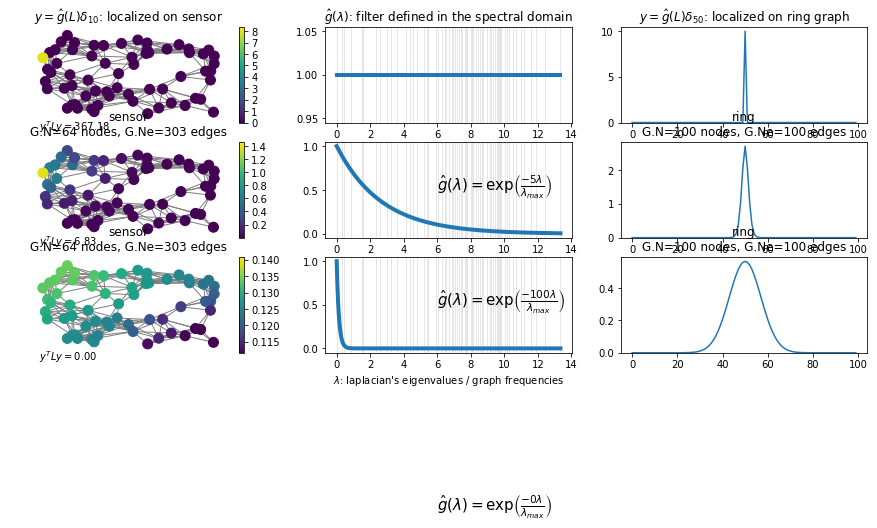

In [2]:
G1 = graphs.Sensor(seed=42)
G1.compute_fourier_basis()
G2 = graphs.Ring(N=100)
G2.compute_fourier_basis()
G2.set_coordinates('line1D')

TAUS = [0, 5, 100]
DELTA = 10

fig, axes = plt.subplots(len(TAUS), 3, figsize=(15, 6))

for i, tau in enumerate(TAUS):
    g1 = filters.Heat(G1, tau)
    g2 = filters.Heat(G2, tau)
    
    y = g1.localize(DELTA).squeeze()
    G1.plot_signal(y, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].text(0, -0.2, '$y^T L y = {:.2f}$'.format(y.T @ G1.L @ y))
    
    G2.plot_signal(g2.localize(G2.N//2), ax=axes[i, 2])
    
    g1.plot(ax=axes[i, 1])
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    text = r'$\hat{{g}}(\lambda) = \exp \left( \frac{{-{{{}}} \lambda}}{{\lambda_{{max}}}} \right)$'.format(tau)
    axes[i, 1].text(6, 0.5, text, fontsize=15)
    
axes[0, 0].set_title('$y = \hat{{g}}(L) \delta_{{{}}}$: localized on sensor'.format(DELTA))
axes[0, 1].set_title('$\hat{g}(\lambda)$: filter defined in the spectral domain')
axes[0, 2].set_title('$y = \hat{{g}}(L) \delta_{{{}}}$: localized on ring graph'.format(G2.N//2))
axes[-1, 1].set_xlabel("$\lambda$: laplacian's eigenvalues / graph frequencies")

## 5.2 Filterbanks

**TODO**:
* popular filterbanks
* tight vs non-tight

In [ ]:
G = graphs.Ring(N=20)
G.estimate_lmax()
G.set_coordinates('line1D')
g = filters.HalfCosine(G)
s = g.localize(G.N // 2)
g.plot()
G.plot_signal(s)

## 5.3 Approximations

**TODO**
* Approximation with Chebyshev polynomials.
* Show computational advantage.
* Show how it smoothes the original filterbank.

## 5.4 Exercise

Solve the following problem using a graph filter:
$$\mathbf{x}^* = \operatorname*{arg\,min}_{\mathbf{x} \in \mathbb{R}^N} \|\mathbf{y} - \mathbf{x}\|_2^2 + \alpha \mathbf{x}^\intercal \mathbf{L} \mathbf{x},$$
where $y$ is the observed signal, $\alpha$ is an hyper-parameter which controls the trade-off between the data fidelity term and the smoothness prior.

In [ ]:
# Your code here.